In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.5.3'

In [3]:
pd.show_versions()

C:\Users\Hp\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.10.9.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19045
machine          : AMD64
processor        : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.5.3
numpy            : 1.23.5
pytz             : 2022.7
dateutil         : 2.8.2
setuptools       : 65.6.3
pip              : 22.3.1
Cython           : None
pytest           : 7.1.2
hypothesis       : None
sphinx           : 5.0.2
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.1
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.10.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.5
bro

In [4]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

In [5]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [6]:
#  Display a summary of the basic information about this DataFrame and its data (hint: there is a single method that can be called on the DataFrame).
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [7]:
# Return the first 3 rows of the DataFrame df.
# df.iloc[:3]
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [8]:
# Select just the 'animal' and 'age' columns from the DataFrame df.
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [9]:
# Select the data in rows [3, 4, 8] and in columns ['animal', 'age'].
df.loc[df.index[[3,4,8]], ['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [10]:
# Select only the rows where the number of visits is greater than 3.
df[df['visits']>3]

,animal,age,visits,priority


In [11]:
# Select the rows where the age is missing, i.e. it is NaN.
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [12]:
# Select the rows where the animal is a cat and the age is less than 3
df[(df['animal']=='cat') & (df['age']==3)]

,animal,age,visits,priority
b,cat,3.0,3,yes


In [13]:
df.loc[(df['animal']=='cat') & (df['age']==3), ['animal','age']]

,animal,age
b,cat,3.0


In [14]:
# Select the rows the age is between 2 and 4 (inclusive).
df[df['age'].between(2,4) ]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [15]:
# Change the age in row 'f' to 1.5.
df.loc['f','age']= 1.5

In [16]:
# Calculate the sum of all visits in df (i.e. the total number of visits).
df['visits'].sum()

19

In [17]:
# Calculate the mean age for each different animal in df.
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [18]:
# Append a new row 'k' to df with your choice of values for each column. Then delete that row to return the original DataFrame.
df.loc['k'] = [5.5,'dog','no',2]
# df.drop('k')
df.drop("k",inplace=True)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [19]:
# Count the number of each type of animal in df.
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

In [20]:
# Sort df first by the values in the 'age' in decending order, then by the value in the 'visits' column in ascending order (so row i should be first, and row d should be last).
df.sort_values(["age","visits"], ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [21]:
df['priority']=df['priority'].map({"no":False,"yes":True})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [22]:
# In the 'animal' column, change the 'snake' entries to 'python'.=
df['animal']=df['animal'].replace("snake","python")
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [26]:
pt =df.pivot_table(index='animal',columns='visits', values='age',aggfunc='mean')

<Axes: xlabel='visits', ylabel='animal'>

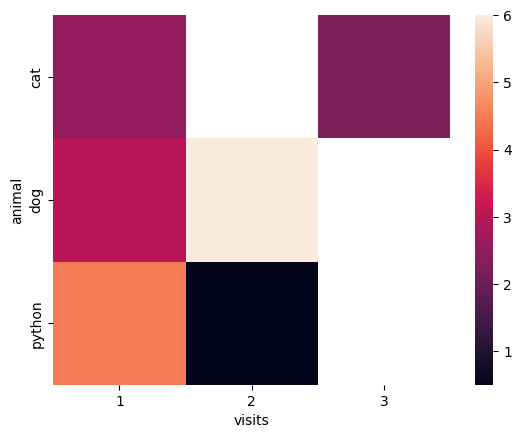

In [27]:
import seaborn as sns
sns.heatmap(pt)